<a href="https://colab.research.google.com/github/arifaygun/CustomerEye/blob/main/Trustpilot_Report_(Template2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.1 MB/s eta 0:00:00


In [19]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.ticker import FixedLocator
from wordcloud import WordCloud
from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Customereye Reports/

df = pd.read_csv('Sentiment Datasets/advance_america_sentiment_analysis_2024-03-21_16-26-16.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Customereye Reports


,Year,Experience Date,Review Date,Reply Date,Exp to Review,Review to Reply,Rating,Countries,Reviews,Replies,Sentiment
0,2023,2023-12-05,2023-12-09,2023-12-09,4,0,5,United States,Everything was nice and clean and the… Everyt...,Thank you for your positive review. At Advance...,5
1,2023,2023-12-07,2023-12-09,2023-12-09,2,0,5,United States,I enjoy the welcome they give and take… I enjo...,Thank you for your positive review. At Advance...,5
2,2023,2023-12-07,2023-12-09,2023-12-09,2,0,5,United States,Fast and friendly service nan,Thank you for your positive review. At Advance...,5
3,2023,2023-12-09,2023-12-09,2023-12-09,0,0,5,United States,Shannon was very helpful Shannon was very help...,Thank you for your positive review. At Advance...,5
4,2023,2023-12-07,2023-12-09,2023-12-09,2,0,5,United States,Great experience nan,Thank you for your positive review. At Advance...,5


In [15]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text


# Apply the preprocessing function to the "Reviews" column in each DataFrame
df['Cleaned_Reviews'] = df['Reviews'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


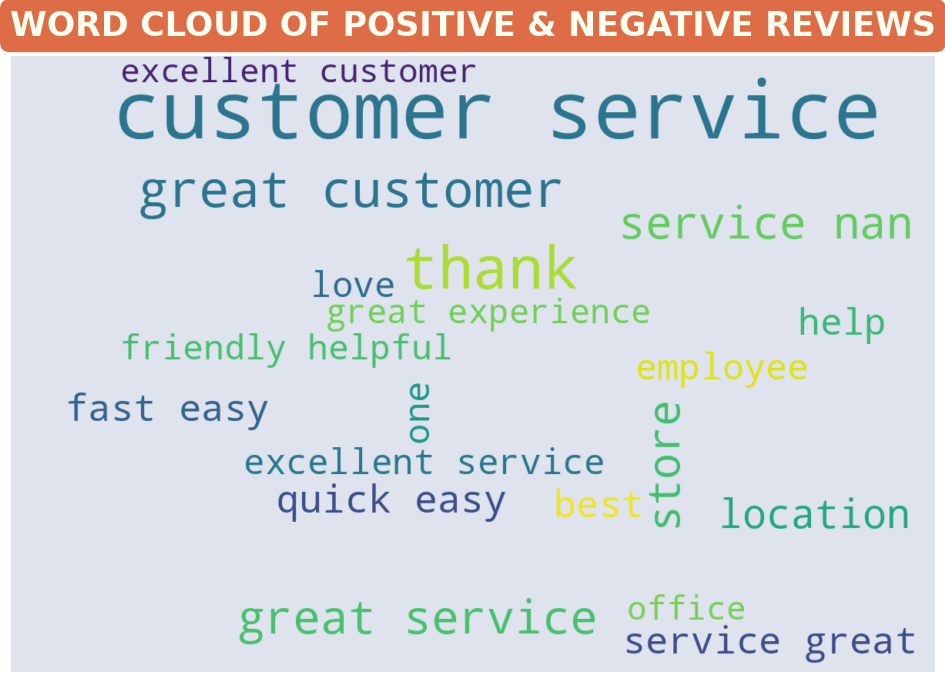

Most common words in the word cloud:
customer service: 1.0
thank: 0.4653651482284888
great customer: 0.34490238611713664
great service: 0.2775126536514823
service nan: 0.2604483007953724
store: 0.25206073752711494
location: 0.20997830802603037
quick easy: 0.19522776572668113
service great: 0.18973246565437454
best: 0.18698481561822125
fast easy: 0.18452639190166306
help: 0.17801879971077367
employee: 0.16948662328271874
love: 0.15950831525668835
one: 0.15806218365871294
excellent service: 0.15777295733911786
friendly helpful: 0.1492407809110629
great experience: 0.14548083875632684
excellent customer: 0.1412870571221981
office: 0.1408532176428055


In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_and_display_wordcloud(data, title, exclude_words=None):
    if exclude_words is None:
        exclude_words = []

    # Convert exclude words to lowercase for case-insensitive comparison
    exclude_words_lower = [word.lower() for word in exclude_words]

    # Generate the word cloud with a gray background
    wordcloud = WordCloud(width=1200, height=800, background_color='gray', stopwords=exclude_words_lower, colormap='viridis').generate(' '.join(data.dropna()))

    # Sort the word cloud in descending order
    sorted_wordcloud = dict(sorted(wordcloud.words_.items(), key=lambda item: item[1], reverse=True))

    # Get the top 20 results
    top_20 = dict(list(sorted_wordcloud.items())[:20])

    # Create a new figure
    plt.figure(figsize=(12, 8))

    # Set the title with a colored background
    plt.title(title, fontsize=24, fontweight='bold', color='#FFFFF0', bbox=dict(facecolor='#de6d47', edgecolor='none', boxstyle='round,pad=0.3'), pad=15)

    # Display the word cloud for only the top 10 words
    wordcloud = WordCloud(width=1200, height=800, background_color='#dfe3ee').generate_from_frequencies(top_20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Show the plot
    plt.show()

    # Print the most common words
    print("Most common words in the word cloud:")
    for word, frequency in top_20.items():
        print(f"{word}: {frequency}")

# Apply the function to your DataFrame, excluding specific words
exclude_words = ['advance', 'america']
generate_and_display_wordcloud(df['Cleaned_Reviews'], 'WORD CLOUD OF POSITIVE & NEGATIVE REVIEWS', exclude_words)
